In [16]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot  as plt
import pandas as pd
import numpy as np

DISTILBERT MODEL....
T-SNE || Visualizing sentence embeddings...


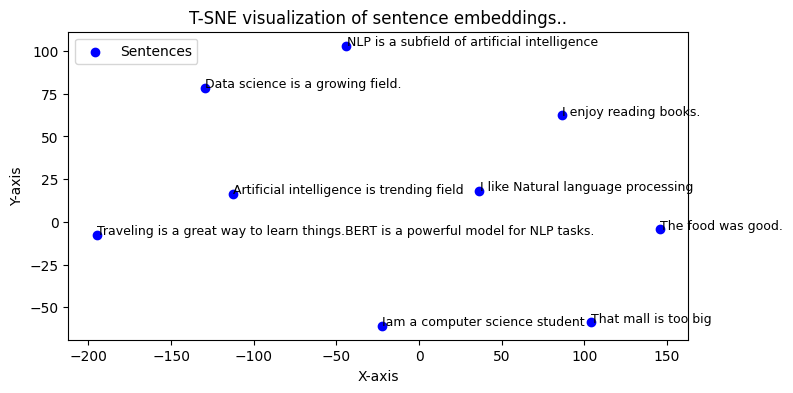

In [22]:
def load_model():
    tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
    model= DistilBertModel.from_pretrained('distilbert-base-uncased')
    return tokenizer, model


def embedding(sentences, tokenizer, model):
    embeddings= []
    with torch.no_grad():
        for s in sentences:
            inputs = tokenizer(s, return_tensors='pt', truncation= True, padding = True, max_length=128)
            outputs = model(**inputs)
            sentence_embedding= outputs.last_hidden_state[:,0,:].squeeze().numpy()
            embeddings.append(sentence_embedding)
    return np.array(embeddings)



def plot(embedding, labels=None):
    tsne=TSNE(n_components=2, perplexity=5, random_state=42)
    reduced_embeddings= tsne.fit_transform(embedding)
    plt.figure(figsize=(8,4))
    plt.scatter(reduced_embeddings[:,0], reduced_embeddings[:,1],c='blue', label='Sentences')
    if labels:
        for i, label in enumerate(labels):
            plt.text(reduced_embeddings[i,0]+ 0.1, reduced_embeddings[i, 1] + 0.1, label, fontsize=9)
        plt.title("T-SNE visualization of sentence embeddings..")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.legend()
        plt.show()

def main():
    sentences=["Iam a computer science student",
               "I like Natural language processing",
              "NLP is a subfield of artificial intelligence",
              "Artificial intelligence is trending field",
              "That mall is too big",
              "Data science is a growing field.",
              "I enjoy reading books.",
              "The food was good.",
              "Traveling is a great way to learn things."
              "BERT is a powerful model for NLP tasks."
              ]
    tokenizer, model=load_model()
    print("DISTILBERT MODEL....")
    embeddings = embedding(sentences, tokenizer, model)
    print("T-SNE || Visualizing sentence embeddings...")
    plot(embeddings, labels=sentences)

if __name__ == "__main__":
    main()


